# HOUSE PRICE PREDICTION

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import re

import warnings
warnings.filterwarnings('ignore')




In [14]:
df = pd.read_csv(r"C:\Users\91859\Downloads\HousingPrices-Amsterdam-August-2021.csv")
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [12]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [13]:
df.shape

(924, 8)

In [16]:
# counts null values in each column of dataset
df.isnull().sum()


Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [15]:
#Duplicate Row in a Dataframe
df.duplicated().sum()

0

In [17]:
#Removing rows which contain missing values 
df.dropna(inplace=True)

In [18]:
# Delete unneeded columns
df.drop(columns=['Address', 'Zip'], axis=1, inplace=True)

In [19]:
# list each of Categorical and Numerical columns
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

In [20]:
# Dealing with outliers
for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

# Exploratory Data Analysis (EDA) 

In [21]:
df

,Unnamed: 0,Price,Area,Room,Lon,Lat
0,1,685000.0,64,3,4.907736,52.356157
1,2,475000.0,60,3,4.850476,52.348586
2,3,850000.0,109,4,4.944774,52.343782
3,4,580000.0,128,6,4.789928,52.343712
4,5,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...
919,920,750000.0,117,1,4.927757,52.354173
920,921,350000.0,72,3,4.890612,52.414587
921,922,350000.0,51,3,4.856935,52.363256
922,923,599000.0,113,4,4.965731,52.375268


In [29]:
# Define a function to visualize the numerical columns
def num_cols_vis(col):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

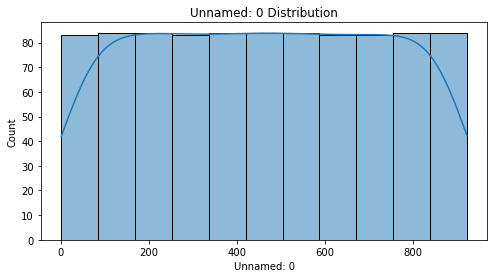

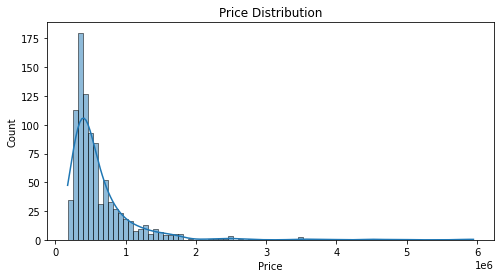

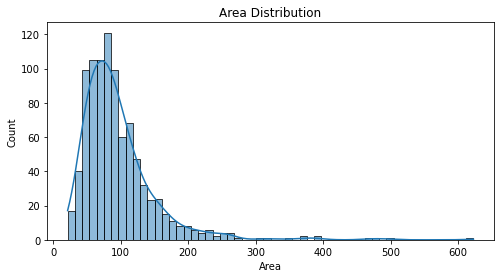

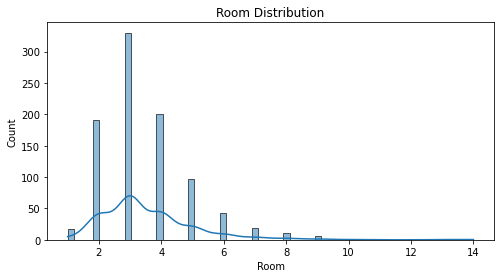

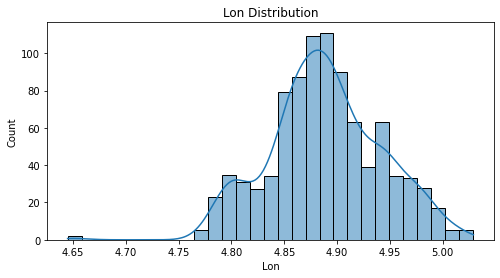

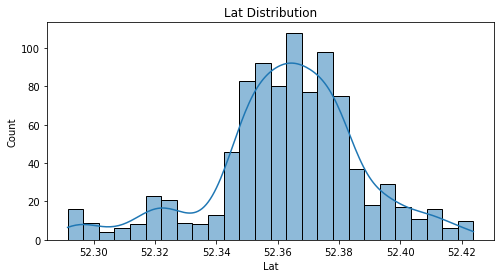

In [30]:
# Call the previous function
for col in numerical_columns:
    num_cols_vis(col)

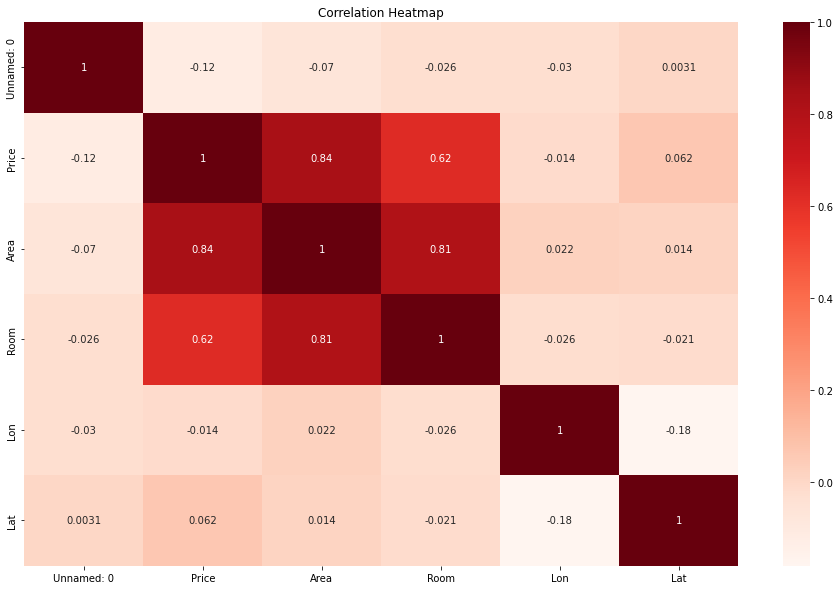

In [32]:
# Display the correlation matrix to find the relationship between each column and the target column
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

# SPLITING THE DATA

In [38]:
X = df.drop(['Price'], axis=1) 
y = df['Price']
print(X)
print(y)


     Unnamed: 0  Area  Room       Lon        Lat
0             1    64     3  4.907736  52.356157
1             2    60     3  4.850476  52.348586
2             3   109     4  4.944774  52.343782
3             4   128     6  4.789928  52.343712
4             5   138     5  4.902503  52.410538
..          ...   ...   ...       ...        ...
919         920   117     1  4.927757  52.354173
920         921    72     3  4.890612  52.414587
921         922    51     3  4.856935  52.363256
922         923   113     4  4.965731  52.375268
923         924    79     4  4.810678  52.355493

[920 rows x 5 columns]
0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 920, dtype: float64


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Models

In [40]:
# Define and Train Models
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
from xgboost import XGBRegressor

# Importing XGBOOST LIBRARIES

In [45]:
# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)                                       

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# MODEL ACCURACY

In [46]:
rf.score(X_test, y_test)

0.8378585447425219

In [47]:
xgb.score(X_test, y_test)

0.8156860652377789

In [ ]:
#Model Tuning

In [48]:
rf_params = {
     'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1)

rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", np.sqrt(-rf_grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 266222.10956968635


In [49]:
# XGBoost Hyperparameter Tuning
# Grid of parameters to tune
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# GridSearchCV
xgb_grid = GridSearchCV(estimator=XGBRegressor(random_state=42),
                        param_grid=xgb_params,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=1)

xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best score for XGBoost:", np.sqrt(-xgb_grid.best_score_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score for XGBoost: 262948.1765372926


In [43]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.
